> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset contains data about the patients missing doctor appointments. It includes 110527 data samples with 22319 data samples showing patiets who missed the appointments representing 20% of the whole dataset.

## Questions to be answered:
<h3>1.How many people did not show up for the appointment?</h3><br>
<h3>2. What is the ratio of men to women concerning attending or missing the appointments?</h3><br>
<h3>3. Does the sms_received column have an impact on the indivduals attendance?</h3><br>
<h3>4. Who are most likely not to show up ?</h3><br>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
df=pd.read_csv('no_show.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()
#There are no null values in the original dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [5]:
#I will drop the PatiendId, AppointmentId for now
df.drop(['PatientId','AppointmentID','Neighbourhood'],inplace=True,axis=1)

In [6]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,0,No


In [7]:
#change the columns names into lower case
df.columns=[x.lower() for x in df.columns]
#change column name no-show to be no_show
df.rename(columns={'no-show':'no_show'},inplace=True)
df.columns

Index(['gender', 'scheduledday', 'appointmentday', 'age', 'scholarship',
       'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received',
       'no_show'],
      dtype='object')

In [8]:
df.corr()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
age,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643
scholarship,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194
hipertension,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267
diabetes,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550
alcoholism,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147
handcap,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161
sms_received,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000



### Data Cleaning (Replace this with more specific notes!)

In [9]:
#Replace yes and no with values 1,0
df.no_show.replace(['Yes','No'],[1,0],inplace=True)

#Replace the handcap values with 1,0
df.handcap.replace([2,3,4],[1,1,1],inplace=True)
df.head()

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,0
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,0,0
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,0,0
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,0,0
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,0,0


In [10]:
#convert date fields into date format
df.scheduledday=pd.to_datetime(df.scheduledday).apply(lambda x:x.strftime('%Y-%m-%d'))
df.appointmentday=pd.to_datetime(df.appointmentday).apply(lambda x:x.strftime('%Y-%m-%d'))
df.scheduledday=pd.to_datetime(df.scheduledday)
df.appointmentday=pd.to_datetime(df.appointmentday)
#create a new column containing the difference between the scheduled_date and the appintment date
df['diff_dates']=df.appointmentday-df.scheduledday

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (How many people did not show up for the appointment?)
answer: 22319
That makes 20% of the whole dataset

In [11]:
#create a sub dataframe containing info of the no=show records
c=df[df.no_show==1].shape
print('The total count of people who missed the appointments is {}'.format(c))
ratio=c[0]/df.shape[0]
print('The ratio is {:.2f}'.format(ratio))

The total count of people who missed the appointments is (22319, 12)
The ratio is 0.20


In [12]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
#extract the dufference between dates as it included days and time; then convert the difference into int
df.diff_dates=df.diff_dates.astype(str)
df.diff_dates=[int(x.split(" ")[0]) for x in df.diff_dates]


In [13]:
#drop date fields 
df.drop(['appointmentday','scheduledday'],inplace=True,axis=1)

In [14]:
df.head()

,gender,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,diff_dates
0,F,62,0,1,0,0,0,0,0,0
1,M,56,0,0,0,0,0,0,0,0
2,F,62,0,0,0,0,0,0,0,0
3,F,8,0,0,0,0,0,0,0,0
4,F,56,0,1,1,0,0,0,0,0


## What is the ratio of men to women concerning attending or missing the appointments?
Total no_show is 22319
Total men count in the dataset=38,687
Total men who missed the appointments=7725; that reprsents 20% of the total men count

Total women count=71840
Total women who missed the appointments= 14594; that represents 20% of the total women count

no_show  gender
0        F         57246
         M         30962
1        F         14594
         M          7725
dtype: int64


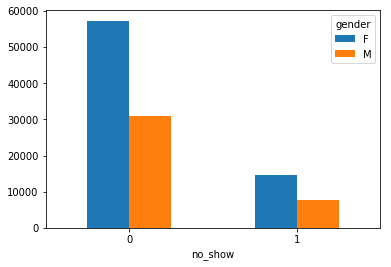

In [15]:
df.groupby(['no_show','gender']).size().unstack().plot(kind='bar',rot=0)
print(df.groupby(['no_show','gender']).size())

## Does the sms_received column have an impact on the indivduals attendance?


Total people who did not received sms=75045
The ratio of people who missed the appointments= 62510; that represents 83%

Total people who received sms=35482
Total people who missed the appointments=9784; that represents 27.6% 

no_show  sms_received
0        0               62510
         1               25698
1        0               12535
         1                9784
dtype: int64


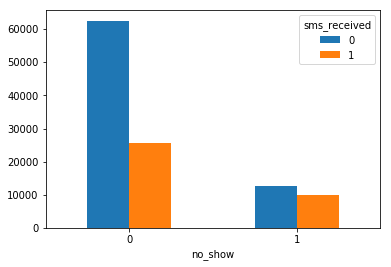

In [16]:
print(df.groupby(['no_show','sms_received']).size())
df.groupby(['no_show','sms_received']).size().unstack().plot(kind='bar',rot=0)

### Research Question  Who are most likely not to show up ?
<br>
the ratio of people who missed the appointmets to people who did went to the appointmens is almost similar for the different categories(zero,one,two,three,and four illnesse(s))

no_show  diabetes  alcoholism  handcap
0        0         0           0          77850
                               1           1435
                   1           0           2351
                               1             59
         1         0           0           5909
                               1            331
                   1           0            264
                               1              9
1        0         0           0          19928
                               1            343
                   1           0            613
                               1              5
         1         0           0           1317
                               1             54
                   1           0             54
                               1              5
dtype: int64


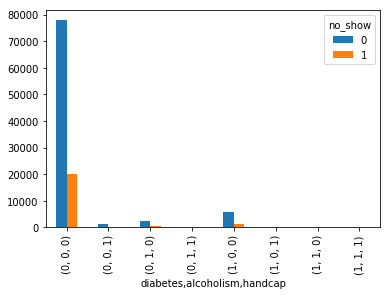

In [17]:
df.groupby(['diabetes','alcoholism','handcap','no_show']).size().unstack().plot(kind='bar');
print(df.groupby(['no_show','diabetes','alcoholism','handcap']).size())

In [18]:
df['illnesses']=df[['diabetes','hipertension','alcoholism','handcap']].sum(axis=1)
df.groupby(['illnesses','no_show']).size().unstack()

no_show,0,1
illnesses,,
0,66512,17603
1,14874,3249
2,6290,1368
3,523,95
4,9,4


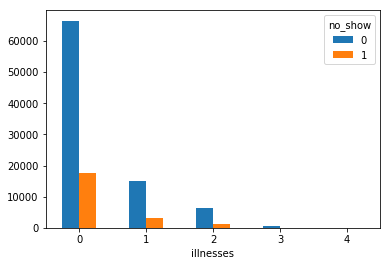

In [19]:
df.groupby(['illnesses','no_show']).size().unstack().plot(kind='bar',rot=0);

<a id='conclusions'></a>
## Conclusions

The dataset contains data about the patients missing doctor appointments. It includes 110527 data samples with 22319 data samples showing patiets who missed the appointments representing 20% of the whole dataset. Concerning cleaning, the dataset has no missing values. Therefore, I did not drop any rows due to missing values. Initially, three columns (patientId,appointmentID, and neighborhood) were dropped as they did not include information that are related to the analysis. The date fileds were in the wrong data type as they were string, so they were converted into datetime type; then the difference between the dates was calculated to check whether thers is a correlation between the difference betweem dates and missing the appointments or not, finally, the original date fields were dropped and and a new field describing the difference between the dates was added. 

Concerning investigation, there is no relationship between the gender and missing the appointments as the ratios of both men and women are almost similar. Another variale is whether the patients recieved sms to remind them of the appointment or not, people who did not receive any SMSs were more likley to miss the appoinment as the ratio of people who did not receive SMS and missed the appointments represent 83 of the, whereas the ratio of people who received SMS and missed the appointments is 27%. Regarding the illneses, the ratio of people who missed the appointmets to people who did went to the appointmens is almost similar for the different categories(zero,one,two,three,and four) illnesse(s). 

In [20]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0